ME200, Johannes Ruf and Luitgard Veraart

# Solutions to Assignment 9

$ \def\pounds{\unicode{x00A3}} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

In [2]:
rng = np.random.default_rng(12345)

## Exercise 37: (Pricing a given European option)

1. In order to have no arbitrage we need $d < 1+r < u$ which is equivalent to $-\frac{2}{3} < r < 2$. 
2. Here $\tilde{p} = \frac{1+r - d}{u-d} = \frac{1+\frac{2}{3} - \frac{1}{3}}{3-\frac{1}{3}}=\frac{1}{2}$ and the time-0 price is given by
\begin{align*}
V_0&=X_0^{\varphi} = \frac{1}{(1+r)^2} \left( V_2(HH) \tilde{p}^2 + V_2(HT) \tilde{p}(1-\tilde{p}) + V_2(TH) \tilde{p}(1 - \tilde{p}) + V_2(TT)(1-\tilde{p})^2\right)\\
&=\frac{1}{(1+\frac{2}{3})^2} \left( (1-x) \frac{1}{4} + 2 x  \frac{1}{4} + (x - \frac{1}{2})  \frac{1}{4}\right) \\
&= \frac{9}{25} \frac{1}{4} \left(2x + \frac{1}{2}\right)\\
&= \frac{9}{25} \frac{1}{2}  x + \frac{9}{25} \frac{1}{8}. 
\end{align*}

## Exercise 38: (Asian option)
1. Suppose at time $n$ we have $S_n=s$ and $Y_n=y$. Then at time $n+1$ we have:
 
 + if the coin toss is H: $S_{n+1} = us$, $Y_{n+1}=Y_n + S_{n+1} = Y_n + u S_n$. 
 + if the coin toss is T: $S_{n+1} = ds$, $Y_{n+1}=Y_n + S_{n+1} = Y_n + d S_n$.

Therefore, formula (8.13) and (8.14) take the form
\begin{align*}
v_n(s, y) = \frac{1}{1+r} \left( \tilde{p} v_{n+1}(us, y+us) + (1-\tilde{p}) v_{n+1}(ds, y+ds) \right)
\end{align*}
and 
\begin{align*}
\Delta_n(s,y) = \frac{v_{n+1}(us, y+us) - v_{n+1} (ds, y+ds)}{us -ds}. 
\end{align*}

2. Then, we obtain
\begin{align*}
v_3(32, 60)&=(60/4-4)^+=11,\\ 
v_3(8, 36)&=(36/4-4)^+=5, \\
v_3(8, 24)&=(24/4-4)^+=2, \\
v_3(8, 18)&=(18/4-4)^+=0.5, \\
v_3(2, 18)&=(18/4-4)^+=0.5, \\
v_3(2, 12)&=(12/4-4)^+=0, \\
v_3(2, 9)&=(9/4-4)^+=0, \\
v_3(0.5, 7.5)&=(7.5/4-4)^+=0. 
\end{align*}
Next we use the recursion to compute $v_2$: 
\begin{align*}
v_2(16, 28)& =\frac{4}{5} \left( \frac{1}{2} v_3(32, 60) + \frac{1}{2} v_3(8, 36)\right)=\frac{2}{5}(11+5)=6.4, \\
v_2(4, 16)& =\frac{4}{5} \left( \frac{1}{2} v_3(8, 24) + \frac{1}{2} v_3(2, 18)\right)=\frac{2}{5}(2+0.5)=1, \\
v_2(4, 10)& =\frac{4}{5} \left( \frac{1}{2} v_3(8, 18) + \frac{1}{2} v_3(2, 12)\right)=\frac{2}{5}(0.5+0)=0.2, \\
v_2(1, 7)& =\frac{4}{5} \left( \frac{1}{2} v_3(2, 9) + \frac{1}{2} v_3(0.5, 7.5)\right)=\frac{2}{5}(0+0)=0. 
\end{align*}
Again we use the recursion to compute $v_1$: 
\begin{align*}
v_1(8, 12)&=\frac{4}{5} \left( \frac{1}{2} v_2(16, 28) + \frac{1}{2} v_2(4, 16)\right)=\frac{2}{5}(6.4+1)=2.96, \\
v_1(2, 6)&=\frac{4}{5} \left( \frac{1}{2} v_2(4, 10) + \frac{1}{2} v_2(1, 7)\right)=\frac{2}{5}(0.2 + 0)=0.08. 
\end{align*}
Finally, we get the time-0 price: 
\begin{align*}
v_0(4, 4)&=\frac{4}{5} \left( \frac{1}{2} v_1(8, 12) + \frac{1}{2} v_2(2, 6)\right)=\frac{2}{5}(2.96+0.08)=1.216. 
\end{align*}
3. The formula for $\Delta_n(s, y)$ has been derived in part 1.

## Exercise 39: (Generating samples from the normal distribution)

1. 
\begin{align*}
\textrm{E}[Z] = \textrm{E}[\sum_{i=1}^{12} U_i] = \sum_{i=1}^{12} \textrm{E}[U_i] = \sum_{i=1}^{12} \frac{1}{2}\left(\frac{1}{2} - \frac{1}{2} \right)=0  
\end{align*}
and
\begin{align*}
\textrm{Var}(Z)=\textrm{Var}(\sum_{i=1}^{12} U_i) = \sum_{i=1}^{12} \textrm{Var}(U_i) = 
\sum_{i=1}^{12} \frac{1}{12}\left(\frac{1}{2}-\left(-\frac{1}{2}\right) \right)^2=1,  
\end{align*}
where we use the fact that the $U_i$ are independent when we wrote that the variance of the sum is equal to the sum of the variances. 

2. We apply the Central Limit Theorem to the sample of the $U_i$ with 
$U \sim \textrm{Unif}\left(-\frac{1}{2}, \frac{1}{2}\right)$. Then,  
\begin{align*}
\frac{\frac{1}{n} \sum_{i=1}^n U_i - \textrm{E}[U]}{\sqrt{\frac{\textrm{Var}(U)}{n}}}
=\frac{\frac{1}{n} \sum_{i=1}^n U_i}{\sqrt{\frac{1/12}{n}}}
=\frac{\frac{1}{\sqrt{n}} \sum_{i=1}^n U_i}{\sqrt{1/12}}
\end{align*}
follows a standard normal distribution for large $n$. Now with $n=12$ we find that
\begin{align*}
\frac{\frac{1}{\sqrt{12}} \sum_{i=1}^{12} U_i}{\sqrt{1/12}} = Z
\end{align*}
and hence $Z$ has approximately a standard normal distribution by the Central Limit Theorem. 


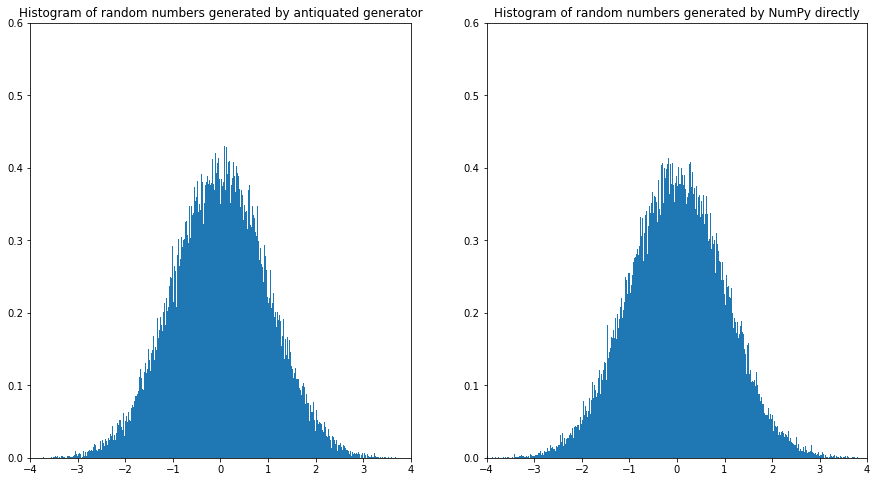

In [3]:
samplesize = 100000
Zs = np.zeros(samplesize)

for i in range(samplesize): 
    u = rng.random(size=12)
    nonstandardu = -0.5 + u
    # Alternatively could use 
    # nonstandardu = rng.uniform(low=-0.5, high=0.5, size=12)
    Zs[i] = nonstandardu.sum()
    
sample_numpy = rng.standard_normal(size = samplesize) 
    

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
axs[0].hist(Zs, bins=1000, density=True);
axs[0].set_title('Histogram of random numbers generated by antiquated generator')
axs[1].hist(sample_numpy, bins=1000, density=True);
axs[1].set_title('Histogram of random numbers generated by NumPy directly');
for ax in axs:
    ax.set_ylim([0, 0.6]);
    ax.set_xlim([-4, 4]);
